FIRST TASK - FRUIT SEGMENTATION AND  DEFECT DETECTION

Treshold the image by Otsu's Algorithm

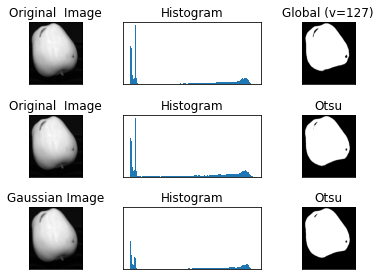

In [37]:
# A script that allows to treshold grayscale fruit's images in order to
# do a bimodularization of the image. 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
#for i in range()
img = cv.imread('C0_000001.png',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original  Image','Histogram','Global (v=127)',
          'Original  Image','Histogram',"Otsu",
          'Gaussian Image','Histogram',"Otsu"]
# It seems that the global tresholding is more accured on the details inside 
# the blobs (the defects), but Otsu's alg is the best approach to keep boards
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    #Give more space to subplots
    plt.tight_layout()
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
plt.show()

(Text(0.5, 1.0, 'Otsu'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

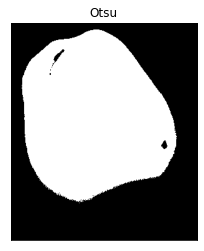

In [38]:
# So let's consider only treshold by Otsu
plt.plot(3,3,6),plt.imshow(images[5],'gray')
plt.title(titles[5]), plt.xticks([]), plt.yticks([])



Fill the holes by a fullfill approach